Data sample:
       Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size Capital/Major City Co2-Emissions     CPI  \
0       6,52,230          3,23,000              Kabul         8,672   149.9   
1         28,748             9,000             Tirana         4,536  119.05   
2      23,81,741          3,17,000            Algiers      1,50,006  151.36   
3            468                 0   Andorra la Vella           469   118.3   
4      12,46,700          1,17,000             Luanda        34,693  261.73   

   Fertility Rate  ...      GNII       HDI Official language  \
0            4.47  ...  0.4

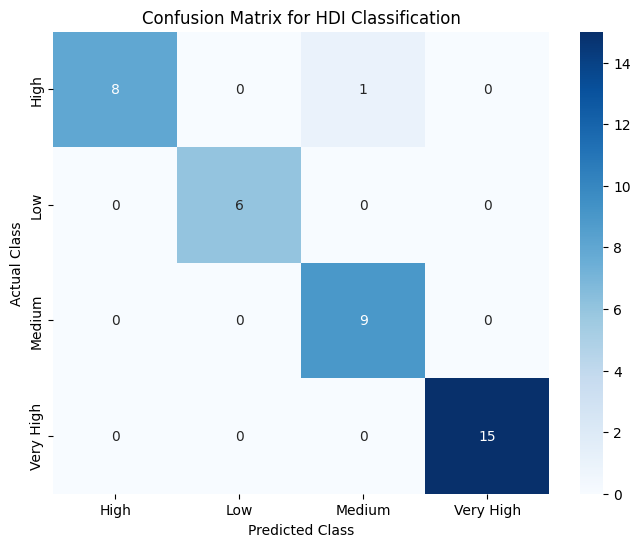

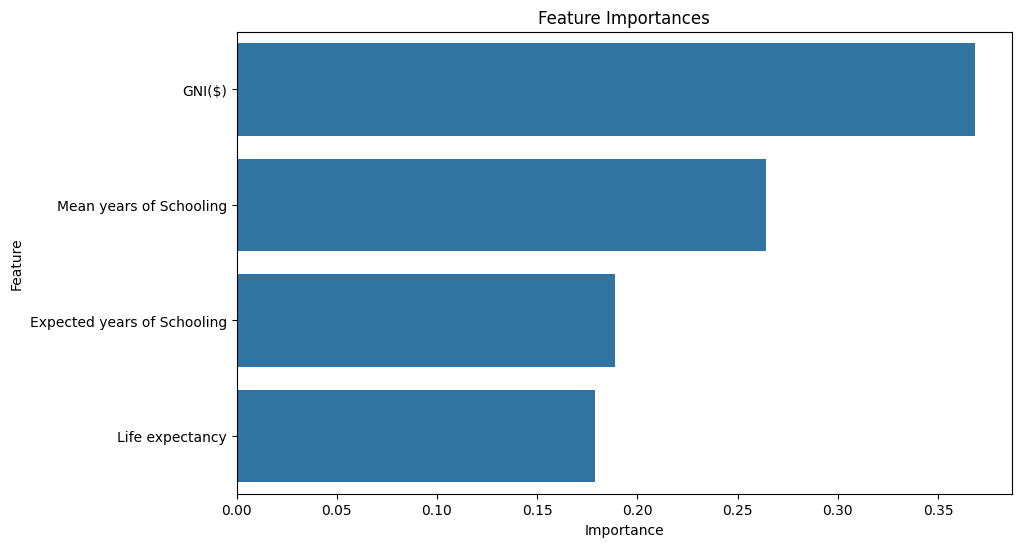

Model Accuracy on Test Set: 97.44%


Conclusion:
- Check the classification report for class-wise precision, recall, and F1-score.
- Accuracy above 80% generally indicates good predictive performance.
- Confusion matrix highlights any frequent misclassifications.

Suggestions for Improvement:
- Tune hyperparameters using GridSearchCV or RandomizedSearchCV.
- Experiment with other classifiers like XGBoost, SVM.
- Address class imbalance if present (e.g., SMOTE).
- Add or refine feature selection.
- Cross-validation for robustness.

If you want, I can help you with hyperparameter tuning or other advanced steps.



In [ ]:

# HDI Classification Model Notebook

# 1. Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset
# Assuming the dataset "world2023cleaned.csv" is saved in the working directory

df = pd.read_csv("/content/2023.csv", encoding='latin1')

# Quick look at the data
print("Data sample:")
print(df.head(), "\n")

# 3. Define HDI classification function and create new column
def classify_hdi(hdi):
    if hdi < 0.55:
        return 'Low'
    elif 0.55 <= hdi < 0.7:
        return 'Medium'
    elif 0.7 <= hdi < 0.8:
        return 'High'
    else:
        return 'Very High'

df['HDI_class'] = df['HDI'].apply(classify_hdi)

print("HDI class distribution:")
print(df['HDI_class'].value_counts(), "\n")

# 4. Select features relevant to HDI and handle missing values

features = ['Life expectancy', 'Expected years of Schooling',
            'Mean years of Schooling', 'GNI($)' ]

# Remove commas in numbers and convert to numeric if needed (some columns may have commas)
for col in features:
    # Remove commas and convert to float where applicable
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '').astype(float)

# Drop rows with missing values in features or target
df_clean = df.dropna(subset=features + ['HDI_class'])

X = df_clean[features]
y = df_clean['HDI_class']

print(f"Features and target shape after cleaning: {X.shape}, {y.shape}\n")

# 5. Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Encoded classes:", list(le.classes_), "\n")

# 6. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}\n")

# 7. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 9. Predict on test set
y_pred = rf.predict(X_test_scaled)

# 10. Evaluation: Classification report and confusion matrix
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for HDI Classification')
plt.show()

# 11. Feature importance visualization
feature_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 12. Conclusion and suggestion printout
accuracy = rf.score(X_test_scaled, y_test)
print(f"Model Accuracy on Test Set: {accuracy*100:.2f}%\n")

print("""
Conclusion:
- Check the classification report for class-wise precision, recall, and F1-score.
- Accuracy above 80% generally indicates good predictive performance.
- Confusion matrix highlights any frequent misclassifications.

Suggestions for Improvement:
- Tune hyperparameters using GridSearchCV or RandomizedSearchCV.
- Experiment with other classifiers like XGBoost, SVM.
- Address class imbalance if present (e.g., SMOTE).
- Add or refine feature selection.
- Cross-validation for robustness.

If you want, I can help you with hyperparameter tuning or other advanced steps.
""")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a regression model for HDI score
X_hdi = df_clean[features]
y_hdi = df_clean['HDI']

X_train_hdi, X_test_hdi, y_train_hdi, y_test_hdi = train_test_split(
    X_hdi, y_hdi, test_size=0.2, random_state=42)

scaler_hdi = StandardScaler()
X_train_hdi_scaled = scaler_hdi.fit_transform(X_train_hdi)
X_test_hdi_scaled = scaler_hdi.transform(X_test_hdi)

# Using a RandomForestRegressor for the HDI score
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_hdi_scaled, y_train_hdi)

# Evaluate the regressor
y_pred_hdi = regressor.predict(X_test_hdi_scaled)
mse = mean_squared_error(y_test_hdi, y_pred_hdi)
print(f"Mean Squared Error for HDI score prediction: {mse:.4f}")

# Predictive Deployment Example with HDI Score

def predict_hdi_class_and_score():
    """
    Takes user input for each feature and predicts the HDI class and score.
    """
    print("Enter the values for the following features to predict the HDI class and score:")

    # Collect user input for each feature
    input_features = {}
    features = ['Life expectancy', 'Expected years of Schooling',
            'Mean years of Schooling', 'GNI($)' ]
    for feature in features:
        while True:
            try:
                value = float(input(f"Enter value for {feature}: "))
                input_features[feature] = value
                break
            except ValueError:
                print("Invalid input. Please enter a numerical value.")

    # Create a DataFrame from the user input
    input_df = pd.DataFrame([input_features])

    # Scale the input features for classification
    input_scaled_classification = scaler.transform(input_df)

    # Scale the input features for regression
    input_scaled_regression = scaler_hdi.transform(input_df)

    # Predict the HDI class
    prediction_encoded = rf.predict(input_scaled_classification)
    prediction_class = le.inverse_transform(prediction_encoded)

    # Predict the HDI score
    predicted_hdi_score = regressor.predict(input_scaled_regression)

    print(f"\nPredicted HDI Class: {prediction_class[0]}")
    print(f"Predicted HDI Score: {predicted_hdi_score[0]:.4f}")

# Run the predictive function
predict_hdi_class_and_score()

Mean Squared Error for HDI score prediction: 0.0005
Enter the values for the following features to predict the HDI class and score:
Enter value for Life expectancy: 56
Enter value for Expected years of Schooling: 15
Enter value for Mean years of Schooling: 12
Enter value for GNI($): 25000

Predicted HDI Class: Very High
Predicted HDI Score: 0.8142


In [ ]:
# This cell has been integrated into the cell above.

In [ ]:
# Predictive Deployment Example with HDI Score

def predict_hdi_class_and_score():
    """
    Takes user input for each feature and predicts the HDI class and score.
    """
    print("Enter the values for the following features to predict the HDI class and score:")

    # Collect user input for each feature
    input_features = {}
    features = ['Life expectancy', 'Expected years of Schooling',
            'Mean years of Schooling', 'GNI($)' ]
    for feature in features:
        while True:
            try:
                value = float(input(f"Enter value for {feature}: "))
                input_features[feature] = value
                break
            except ValueError:
                print("Invalid input. Please enter a numerical value.")

    # Create a DataFrame from the user input
    input_df = pd.DataFrame([input_features])

    # Scale the input features for classification
    input_scaled_classification = scaler.transform(input_df)

    # Scale the input features for regression
    input_scaled_regression = scaler_hdi.transform(input_df)

    # Predict the HDI class
    prediction_encoded = rf.predict(input_scaled_classification)
    prediction_class = le.inverse_transform(prediction_encoded)

    # Predict the HDI score
    predicted_hdi_score = regressor.predict(input_scaled_regression)

    print(f"\nPredicted HDI Class: {prediction_class[0]}")
    print(f"Predicted HDI Score: {predicted_hdi_score[0]:.4f}")

# Run the predictive function
predict_hdi_class_and_score()

Enter the values for the following features to predict the HDI class and score:


KeyboardInterrupt: Interrupted by user

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import pickle

# Load the trained models and scalers
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('scaler_hdi.pkl', 'rb') as f:
    scaler_hdi = pickle.load(f)

with open('le.pkl', 'rb') as f:
    le = pickle.load(f)

with open('rf.pkl', 'rb') as f:
    rf = pickle.load(f)

with open('regressor.pkl', 'rb') as f:
    regressor = pickle.load(f)

# Streamlit app
st.title("HDI Prediction App")

st.write("Enter the values for the following features to predict the HDI class and score:")

# Create input fields for the features
life_expectancy = st.number_input('Life expectancy', min_value=0.0, max_value=100.0, value=70.0)
expected_schooling = st.number_input('Expected years of Schooling', min_value=0.0, max_value=25.0, value=12.0)
mean_schooling = st.number_input('Mean years of Schooling', min_value=0.0, max_value=20.0, value=8.0)
gni = st.number_input('GNI($)', min_value=0, value=10000)

# Create a button to make predictions
if st.button('Predict'):
    # Create a DataFrame from the user input
    input_features = {
        'Life expectancy': life_expectancy,
        'Expected years of Schooling': expected_schooling,
        'Mean years of Schooling': mean_schooling,
        'GNI($)': gni
    }
    input_df = pd.DataFrame([input_features])

    # Scale the input features
    input_scaled_classification = scaler.transform(input_df)
    input_scaled_regression = scaler_hdi.transform(input_df)

    # Predict the HDI class
    prediction_encoded = rf.predict(input_scaled_classification)
    prediction_class = le.inverse_transform(prediction_encoded)

    # Predict the HDI score
    predicted_hdi_score = regressor.predict(input_scaled_regression)

    st.write(f"Predicted HDI Class: {prediction_class[0]}")
    st.write(f"Predicted HDI Score: {predicted_hdi_score[0]:.4f}")

Writing app.py


In [ ]:
import pickle

# Save the trained models and scalers
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('scaler_hdi.pkl', 'wb') as f:
    pickle.dump(scaler_hdi, f)

with open('le.pkl', 'wb') as f:
    pickle.dump(le, f)

with open('rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('regressor.pkl', 'wb') as f:
    pickle.dump(regressor, f)

In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.27.29.39:8501

  Stopping...
^C
